**Affinity Score Clustering**

*Step2: Clustering affinity scores by value of each category*

# 1 Import package

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# 2 Integrated processing data

In [20]:
# Read txt file of POIs
input_file_path = '../../../../data/Locomizer_edited/profiling/whole_year_scores_with_gid_average.txt'
df = pd.read_csv(input_file_path, sep='\t')

df.head()

,gid_10,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,8a0126c2b68ffff,0.000000,0.000000,0.000000,0.000000,0.000000,72.946467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,8a088300294ffff,76.443716,58.702680,87.859590,61.833112,73.835937,119.284336,69.601011,105.670416,61.420281,76.459298,77.836741,81.662601,0.00000,55.297609,63.297789
2,8a0883429a1ffff,0.000000,132.633703,0.000000,25.453428,45.891244,54.820711,81.740151,0.000000,137.224865,71.755746,117.483336,92.076345,198.65746,87.436385,109.477765
3,8a0883530a9ffff,68.465734,89.538856,0.000000,100.103001,44.690856,87.147857,59.899594,0.000000,77.275199,89.917382,80.774538,87.716227,29.71481,107.732313,150.871457
4,8a0883576a9ffff,47.703821,70.744294,108.441842,65.909346,84.795342,40.704757,81.643266,45.414216,19.314684,11.847368,19.768996,21.758932,39.69692,0.000000,28.078527


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82471 entries, 0 to 82470
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gid_10  82471 non-null  object 
 1   101     82471 non-null  float64
 2   102     82471 non-null  float64
 3   103     82471 non-null  float64
 4   104     82471 non-null  float64
 5   105     82471 non-null  float64
 6   106     82471 non-null  float64
 7   107     82471 non-null  float64
 8   108     82471 non-null  float64
 9   109     82471 non-null  float64
 10  110     82471 non-null  float64
 11  111     82471 non-null  float64
 12  112     82471 non-null  float64
 13  113     82471 non-null  float64
 14  114     82471 non-null  float64
 15  115     82471 non-null  float64
dtypes: float64(15), object(1)
memory usage: 10.1+ MB


In [22]:
print(df.columns)

Index(['gid_10', '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115'],
      dtype='object')


In [23]:

selected_columns = df.loc[:, '101':'115']


summary_stats = selected_columns.agg(['count', 'max', 'min', 'mean', 'std'])


print(summary_stats)

                101           102           103           104           105  \
count  82471.000000  82471.000000  82471.000000  82471.000000  82471.000000   
max      330.782087    292.005593    302.968819    271.941959    355.448555   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
mean      41.835741     56.280054     72.083398     51.674285     86.162371   
std       32.330299     33.793729     37.950947     34.536523     39.478416   

                106           107           108           109           110  \
count  82471.000000  82471.000000  82471.000000  82471.000000  82471.000000   
max      304.963011    309.149149    312.125000    313.823878    260.803390   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
mean      80.559530     87.072004     81.170631     42.015957     52.921947   
std       36.757956     39.131215     40.978215     33.287027     36.660317   

                111           112           113   

In [26]:
# Transpose the table so that the column number becomes the first column and the name of the statistic becomes the column name.
summary_stats = summary_stats.T

summary_stats.insert(0, 'Column', summary_stats.index)

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv('./affinity_scores_statistics.csv', index=False)

In [5]:

X = df.iloc[:, 1:16].values

In [6]:
print(X.shape)

(82471, 15)


In [15]:
print(X[:5])

[[  0.           0.           0.           0.           0.
   72.94646733   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 76.44371623  58.70267953  87.85959031  61.83311209  73.8359371
  119.28433598  69.6010106  105.67041585  61.42028082  76.45929766
   77.83674118  81.66260057   0.          55.29760905  63.29778908]
 [  0.         132.6337025    0.          25.45342784  45.89124444
   54.82071113  81.74015069   0.         137.22486487  71.75574575
  117.48333608  92.07634525 198.65745985  87.4363853  109.47776505]
 [ 68.46573443  89.53885579   0.         100.10300136  44.69085559
   87.14785654  59.89959448   0.          77.27519923  89.91738237
   80.77453801  87.71622665  29.71481047 107.73231279 150.87145665]
 [ 47.70382136  70.74429416 108.44184211  65.90934648  84.79534184
   40.70475703  81.64326571  45.41421572  19.31468405  11.84736817
   19.76899636  21.75893234  39.69692006   0.          28.07852715]]


In [7]:
# Define the first range of cluster numbers
cluster_range = range(2, 6)  # Clustering number from 2 to 6
results = []

# Iterate over the first range of cluster numbers
for n_clusters in cluster_range:
    # Output the number of clusters in progress
    print(f"Number of clusters in progress: {n_clusters}")
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=None)  # Randomly initialize centers
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    # Calculate the Calinski-Harabasz index
    ch_score = calinski_harabasz_score(X, cluster_labels)
    # Obtain the Sum of Squared Errors (SSE)
    sse = kmeans.inertia_
    # Calculate the Davies-Bouldin index
    db_score = davies_bouldin_score(X, cluster_labels)

    # Save the results
    results.append({
        'n_clusters': n_clusters,
        'silhouette_score': silhouette_avg,
        'calinski_harabasz_score': ch_score,
        'sse': sse,  # Add SSE value
        'davies_bouldin_score': db_score  # Add Davies-Bouldin index
    })

# Create a DataFrame to save the results
results_df = pd.DataFrame(results)

# Save as a CSV file
results_df.to_csv('./affinity_clustering_scores.csv', index=False)


Number of clusters in progress: 2


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 3


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 4


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 5


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
# Define the second range of cluster numbers
cluster_range_2 = list(range(6, 11)) + list(range(20, 1101, 10))
results_2 = []

# Iterate over the second range of cluster numbers
for n_clusters in cluster_range_2:
    # Output the number of clusters in progress
    print(f"Number of clusters in progress: {n_clusters}")
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=None)  # Randomly initialize centers
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    # Calculate the Calinski-Harabasz index
    ch_score = calinski_harabasz_score(X, cluster_labels)
    # Obtain the Sum of Squared Errors (SSE)
    sse = kmeans.inertia_
    # Calculate the Davies-Bouldin index
    db_score = davies_bouldin_score(X, cluster_labels)

    # Save the results
    results_2.append({
        'n_clusters': n_clusters,
        'silhouette_score': silhouette_avg,
        'calinski_harabasz_score': ch_score,
        'sse': sse,  # Add SSE value
        'davies_bouldin_score': db_score  # Add Davies-Bouldin index
    })

# Create a DataFrame to save the results
results_df_2 = pd.DataFrame(results_2)

# Save as a CSV file
results_df_2.to_csv('./affinity_clustering_scores_1.csv', index=False)

Number of clusters in progress: 6


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 7


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 8


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 9


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 10


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 20


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 30


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 40


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 50


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 60


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 70


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 80


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 90


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 100


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 110


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 120


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 130


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 140


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 150


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 160


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 170


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 180


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 190


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 200


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 210


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 220


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 230


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 240


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 250


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 260


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 270


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 280


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 290


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 300


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 310


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 320


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 330


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 340


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 350


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 360


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 370


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 380


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 390


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 400


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 410


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 420


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 430


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 440


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 450


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 460


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 470


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 480


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 490


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 500


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 510


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 520


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 530


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 540


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 550


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 560


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 570


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 580


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 590


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 600


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 610


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 620


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 630


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 640


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 650


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 660


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 670


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 680


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 690


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 700


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 710


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 720


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 730


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 740


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 750


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 760


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 770


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 780


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 790


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 800


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 810


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 820


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 830


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 840


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 850


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 860


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 870


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 880


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 890


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 900


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 910


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 920


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 930


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 940


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 950


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 960


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 970


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 980


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 990


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 1000


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 1010


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 1020


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 1030


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 1040


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 1050


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 1060


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 1070


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 1080


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters in progress: 1090


/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
# 读取txt文件
df_spatial = pd.read_csv('../../../../data/Locomizer_edited/finland_hexagons_converted.csv')
df_spatial.head()

,geometry,gid_10,center_lat,center_lon,convert_geometry
0,"POLYGON ((60.17773095257783 26.25507443782369,...",8a1135b64a17fff,60.177912,26.256181,"POLYGON ((26.25507443782369 60.17773095257783,..."
1,"POLYGON ((60.19088707363144 26.51127504967518,...",8a1135a64a17fff,60.191066,26.512386,"POLYGON ((26.51127504967518 60.19088707363144,..."
2,"POLYGON ((69.83794580806661 28.29983693737527,...",8a0135964a07fff,69.838522,28.299906,"POLYGON ((28.29983693737527 69.83794580806661,..."
3,"POLYGON ((62.31111228782132 28.52828024024379,...",8a112ed64a17fff,62.311286,28.529498,"POLYGON ((28.52828024024379 62.31111228782132,..."
4,"POLYGON ((62.20202659247287 28.95251817276446,...",8a112ece4a1ffff,62.202196,28.953739,"POLYGON ((28.95251817276446 62.20202659247287,..."


In [2]:
# read in csv cluster result
df_clusters = pd.read_csv('./affinity_clustering_results_15.csv')
df_clusters.head()

,gid_10,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,affinity_cluster_id
0,8a0126c2b68ffff,0.000000,0.000000,0.000000,0.000000,0.000000,72.946467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7
1,8a088300294ffff,76.443716,58.702680,87.859590,61.833112,73.835937,119.284336,69.601011,105.670416,61.420281,76.459298,77.836741,81.662601,0.00000,55.297609,63.297789,12
2,8a0883429a1ffff,0.000000,132.633703,0.000000,25.453428,45.891244,54.820711,81.740151,0.000000,137.224865,71.755746,117.483336,92.076345,198.65746,87.436385,109.477765,4
3,8a0883530a9ffff,68.465734,89.538856,0.000000,100.103001,44.690856,87.147857,59.899594,0.000000,77.275199,89.917382,80.774538,87.716227,29.71481,107.732313,150.871457,0
4,8a0883576a9ffff,47.703821,70.744294,108.441842,65.909346,84.795342,40.704757,81.643266,45.414216,19.314684,11.847368,19.768996,21.758932,39.69692,0.000000,28.078527,1


In [4]:
# Get affinity score clustering result with spatial information
merged_df = pd.merge(df_clusters, df_spatial[['gid_10', 'center_lat', 'center_lon']], on='gid_10', how='left')

print(merged_df.head())

merged_df.to_csv('./affinity_clustering_result_with_location_15.csv', index=False)

            gid_10        101         102         103         104        105  \
0  8a0126c2b68ffff   0.000000    0.000000    0.000000    0.000000   0.000000   
1  8a088300294ffff  76.443716   58.702680   87.859590   61.833112  73.835937   
2  8a0883429a1ffff   0.000000  132.633703    0.000000   25.453428  45.891244   
3  8a0883530a9ffff  68.465734   89.538856    0.000000  100.103001  44.690856   
4  8a0883576a9ffff  47.703821   70.744294  108.441842   65.909346  84.795342   

          106        107         108         109        110         111  \
0   72.946467   0.000000    0.000000    0.000000   0.000000    0.000000   
1  119.284336  69.601011  105.670416   61.420281  76.459298   77.836741   
2   54.820711  81.740151    0.000000  137.224865  71.755746  117.483336   
3   87.147857  59.899594    0.000000   77.275199  89.917382   80.774538   
4   40.704757  81.643266   45.414216   19.314684  11.847368   19.768996   

         112        113         114         115  affinity_cluster_id

# 3 Optimal number of clusters analysis

## 3.1 Elbow methods

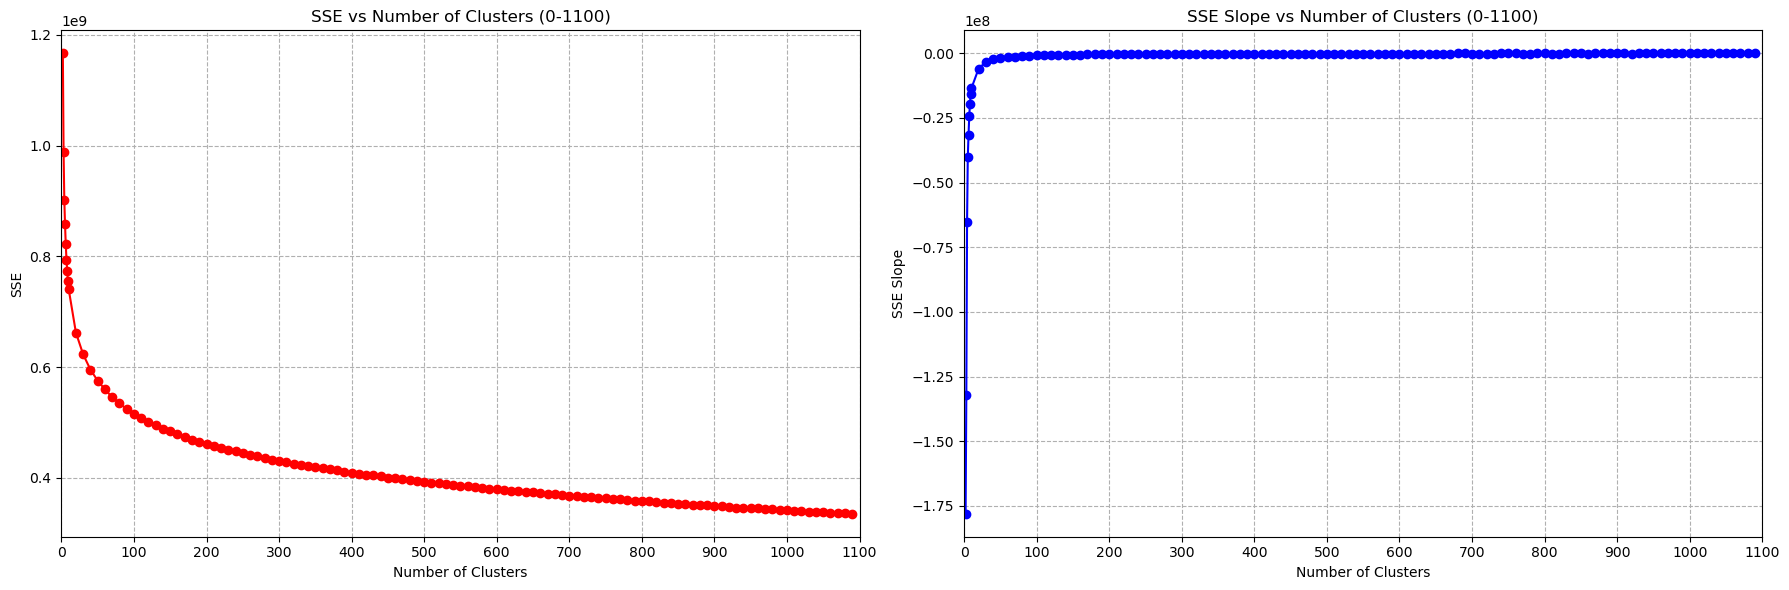

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./affinity_clustering_scores.csv')

sse_slope = np.gradient(df['sse'], df['n_clusters'])


plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(df['n_clusters'], df['sse'], marker='o', color='red')
plt.title('SSE vs Number of Clusters (0-1100)')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xlim(0, 1100)
plt.xticks(range(0, 1101, 100))
plt.grid(True, linestyle='--')


plt.subplot(1, 2, 2)
plt.plot(df['n_clusters'], sse_slope, marker='o', color='blue')
plt.title('SSE Slope vs Number of Clusters (0-1100)')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE Slope')
plt.xlim(0, 1100)
plt.xticks(range(0, 1101, 100))
plt.grid(True, linestyle='--')


plt.tight_layout()
plt.savefig('./affinity_sse_elbow_method_0-1100.png')
plt.show()

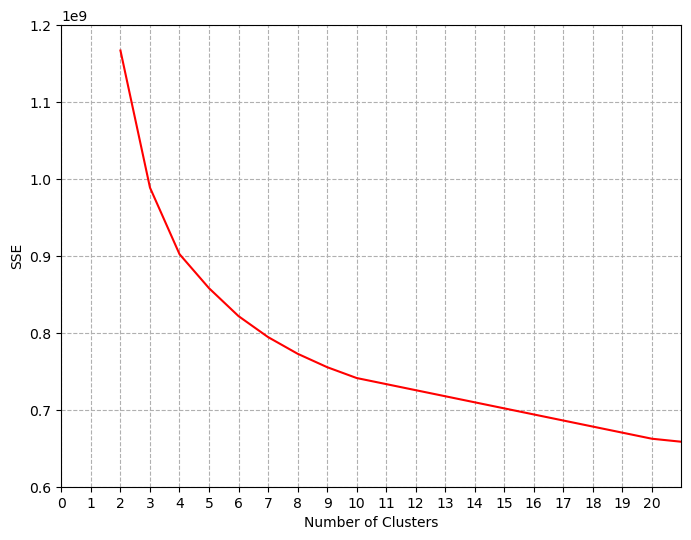

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./affinity_clustering_scores.csv')
plt.figure(figsize=(8, 6))
plt.plot(df['n_clusters'], df['sse'], color='red')
# plt.title('SSE vs Number of Clusters (0-20)')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xlim(0, 21)
plt.xticks(range(0, 21, 1))
plt.ylim(0.6e9, 1.2e9)
plt.grid(True, linestyle='--')


plt.savefig('./affinity_sse_elbow_method_0-20.png')
plt.show()

## 3.2 Silhouette score & calinski_harabasz_score & Davies-Bouldin score

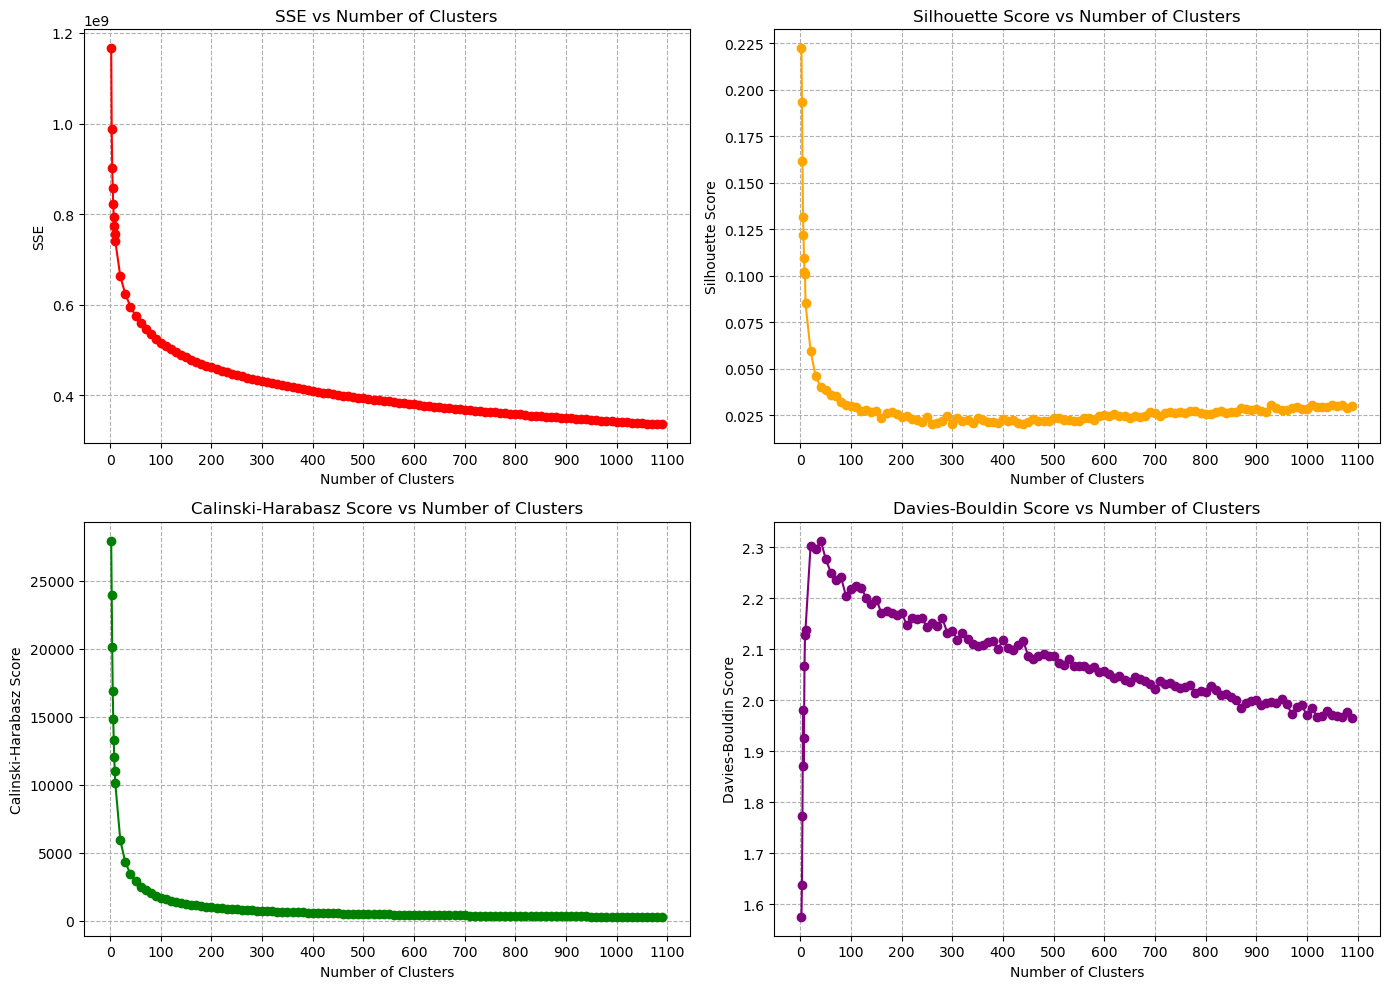

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('./affinity_clustering_scores.csv')


plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
plt.plot(df['n_clusters'], df['sse'], marker='o', color='red')
plt.title('SSE vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xticks(range(0, 1101, 100))  
plt.grid(True, linestyle='--') 

# Silhouette Score
plt.subplot(2, 2, 2)
plt.plot(df['n_clusters'], df['silhouette_score'], marker='o', color='orange')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(0, 1101, 100)) 
plt.grid(True, linestyle='--') 

# Calinski-Harabasz Score
plt.subplot(2, 2, 3)
plt.plot(df['n_clusters'], df['calinski_harabasz_score'], marker='o', color='green')
plt.title('Calinski-Harabasz Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.xticks(range(0, 1101, 100))  
plt.grid(True, linestyle='--') 

# Davies-Bouldin Score
plt.subplot(2, 2, 4)
plt.plot(df['n_clusters'], df['davies_bouldin_score'], marker='o', color='purple')
plt.title('Davies-Bouldin Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(range(0, 1101, 100)) 
plt.grid(True, linestyle='--')  


plt.tight_layout()


plt.savefig('./affinity_clustering_scores_0-1100_all.png')


plt.show()

## 3.2 Specific cluster number run

In [28]:
# Read in data
input_file_path = '../../../../data/Locomizer_edited/profiling/whole_year_scores_with_gid_average.txt'
df = pd.read_csv(input_file_path, sep='\t')


X = df.iloc[:, 1:16].values


n_clusters = 3 


kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X)

df['affinity_cluster_id'] = cluster_labels


df.to_csv('./affinity_clustering_results.csv', index=False)

/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
# Read in data
input_file_path = '../../../../data/Locomizer_edited/profiling/whole_year_scores_with_gid_average.txt'
df = pd.read_csv(input_file_path, sep='\t')


X = df.iloc[:, 1:16].values


n_clusters = 15


kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X)

df['affinity_cluster_id'] = cluster_labels


df.to_csv('./affinity_clustering_results_15.csv', index=False)

/Users/guorui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
